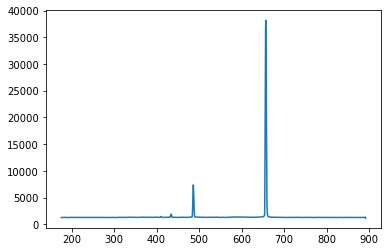

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 16 14:42:44 2021

@author: Nathan
"""


import pandas as pd
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt 

import scipy as sp 
from scipy.optimize import curve_fit 

import interactive_plot as ip

# Determined best fit params are b0 = 14035, b1 = 486.40, b2 = 1.07

def Gaussian(x, a0, a1, b0, b1, b2): # x is wavelenghth
    
    line = a0 + a1*x
    
    exponent1 = (-0.5)*((x-b1)/b2)**2
    gauss = b0*np.exp(exponent1)
    
        
    return  line+gauss

def Two_Gauss_and_Line(x, a0, a1, b0, b1, b2, c0, c1, c2):
    line = a0 + a1*x
    
    exponent1 = (-0.5)*((x-b1)/b2)**2
    gauss1 = b0*np.exp(exponent1)
    
    exponent2 = (-0.5)*((x-c1)/c2)**2
    gauss2 = c0*np.exp(exponent2)
    
        
    return  line + gauss1 + gauss2

h2_data = pd.read_csv("h2 sprectra without peaking.txt", comment = '#', delim_whitespace=True, names=['W', 'I'])

l = h2_data['W']
i = h2_data['I']

plt.plot(l,i)

# Cut the dataframe for data around the beta peak in the Balmer lines
beta_peak = h2_data[(l>482) & (l<490)]





In [2]:
# Find the best fit parameters to provide "guess" for scipy routine
fitparams = [['a0',1000,2000,1200,5],['a1',-10,10,0,0.1],['b0',3000,7000,4500,5],['b1',484,488,485.5,0.01],['b2',0.01,1.5,0.5,0.005],['c0',200,5000,1500,5],['c1',472,495,486.5,0.01],['c2',0.01,1,0.5,0.005]]
function = Two_Gauss_and_Line
plotparams = [['x',482,490],['y',0,8000],[700]]
xData = beta_peak['W']
yData = beta_peak['I']
xErr = None
yErr = None

%matplotlib qt
ip.slider_plot(fitparams,function,plotparams,xData,yData,xErr,yErr)

In [3]:
# Fit the data
guess = [1450,-0.2,5585,486.6,1.03,1215,485.66,0.62] # guess contains the best fit determined from the slider widget. Helps the scipy routine when provided.
popt, pcov = curve_fit(Two_Gauss_and_Line,beta_peak['W'],beta_peak['I'],p0=guess, maxfev = 3600)
print(popt) # y int, slope

[-3.48195511e+03  9.95683531e+00  5.14763555e+03  4.86642480e+02
  1.00043990e+00  1.64800848e+03  4.85616373e+02  7.57914448e-01]


In [4]:
xFit = np.linspace(482,490,700)
yFit = Two_Gauss_and_Line(xFit, *popt)

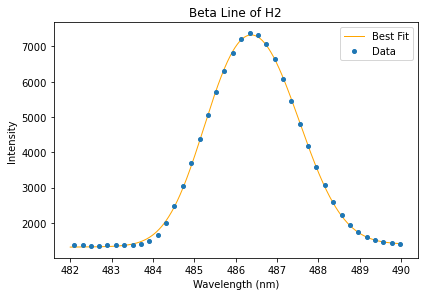

In [5]:
%matplotlib inline
plt.plot(xFit, yFit, label='Best Fit', c='orange', linewidth=1)
plt.plot(beta_peak['W'], beta_peak['I'], marker='o', linestyle='None', label='Data', markersize=4)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.tight_layout()
plt.title("Beta Line of H2")
plt.show()

This graph was generated using a single Gaussian peak - and it doesn't fit the data too well particularly on the left hand side of the peak. The peak is clearly assymetric. Perhaps there is a second Gaussian peak. That's exactly what I test for after the Lorentzian code (the Lorentzian was not needed - it gave a worse fit).

In [6]:
def Lorentzian(x, a0, a1, a2, a3, a4): # x is wavelength
    num = a1
    denom1 = (x-a2)**2
    denom2 = a1**2
    denom = denom1 + denom2
    frac = num/denom
    lorentzian = a0*frac
    
    line = a3 + a4*x
    
    return lorentzian + line

# mu is center location on xaxis, sigma width, 

In [7]:
# Find the best fit parameters to provide "guess" for scipy routine
fitparams = [['a0',3000,17000,4500,5],['a1',0.1,5,2,0.001],['a2',484,488,485.5,0.01], ['a3',1000,2000,1200,5],['a4',-10,10,0,0.1]]
function = Lorentzian
plotparams = [['x',482,490],['y',0,8000],[700]]
xData = beta_peak['W']
yData = beta_peak['I']
xErr = None
yErr = None

# %matplotlib qt
# ip.slider_plot(fitparams,function,plotparams,xData,yData,xErr,yErr)

Now let's do the other peaks in the H2 spectra. NOTE If we get a good fit with the Beta line we don't need to worry about the alpha line, according to Dr. Hetrick.

In [8]:
# Cut the dataframe for data around the alpha peak in the Balmer lines
alpha_peak = h2_data[(l>650) & (l<662)]

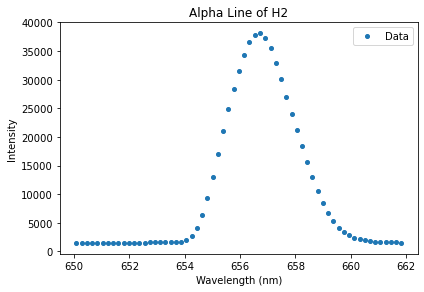

In [9]:
# Plot just the data, no fitting yet.
%matplotlib inline 
#plt.plot(xFit, yFit, label='Best Fit', c='orange', linewidth=1)
plt.plot(alpha_peak['W'], alpha_peak['I'], marker='o', linestyle='None', label='Data', markersize=4)
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.tight_layout()
plt.savefig('Alpha Peak for H2.png',dpi=600)  #Saves as png file. High dpi for better resolution.
plt.savefig('Alpha Peak for H2.pdf')  #Saves as png file. High dpi for better resolution.
plt.title("Alpha Line of H2")
plt.show()

In [10]:
# Find the best fit parameters to provide "guess" for scipy routine
fitparams = [['a0',1000,10000,1200,5],['a1',-10,10,0,0.1],['b0',2000,40000,4500,5],['b1',650,662,655.5,0.01],['b2',0.01,1.25,0.5,0.005]]
function = Two_Gauss_and_Line
plotparams = [['x',650,662],['y',0,40000],[700]]
xData = alpha_peak['W']
yData = alpha_peak['I']
xErr = None
yErr = None

%matplotlib qt
ip.slider_plot(fitparams,function,plotparams,xData,yData,xErr,yErr)

TypeError: Two_Gauss_and_Line() missing 3 required positional arguments: 'c0', 'c1', and 'c2'

In [11]:
def Gaussian1(x, a0, a1, b0, b1, b2, c0, c1, c2):
    
    exponent1 = (-0.5)*((x-b1)/b2)**2
    gauss1 = b0*np.exp(exponent1)
           
    return  gauss1

def Gaussian2(x, a0, a1, b0, b1, b2, c0, c1, c2):
    
    exponent2 = (-0.5)*((x-c1)/c2)**2
    gauss2 = c0*np.exp(exponent2)
           
    return  gauss2

def Line(x, a0, a1, b0, b1, b2, c0, c1, c2):
    
    linear = a0 + a1*x    
            
    return  linear

In [12]:
line = Line(xFit,*popt)
peak1 = Gaussian1(xFit,*popt)
peak2 = Gaussian2(xFit,*popt)


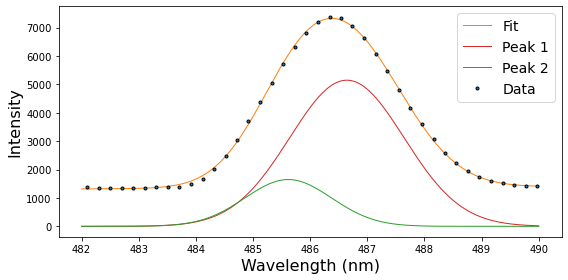

In [17]:
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(xFit,yFit,'-',linewidth=1,color='tab:orange',label='Fit')
ax.plot(xFit,peak1,'-',linewidth=1,color='tab:red',label='Peak 1')
ax.plot(xFit,peak2,'-',linewidth=1,color='tab:green',label='Peak 2')
ax.plot(beta_peak['W'],beta_peak['I'],'o',markersize=3,mec='black',label='Data')
ax.set_xlabel("Wavelength (nm)", fontsize=16)
ax.set_ylabel("Intensity", fontsize=16)
ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('Beta Peak for H2.png',dpi=600)  #Saves as png file. High dpi for better resolution.
plt.savefig('Beta Peak for H2.pdf')  
plt.show()